In [1]:
import pandas as pd
from jupyterthemes import jtplot
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))
jtplot.style()

# Pandas CookBook

* [Question](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/pandas-exercises.ipynb)  
* [Answer](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/pandas-exercises-solutions.ipynb)

### Why Pands?
---
* Simple to use
* Integrated with many other data science & ML Python tools
* Helps you get your data ready for machine learning


### DataType
---

##### Series, 1維資料結構

In [2]:
user_name = pd.Series(['Simon', 'Jay', 'Leo'], name='user_name')
user_name

0    Simon
1      Jay
2      Leo
Name: user_name, dtype: object

In [3]:
# 顯示出此資料結構的 (Rows, Columns)
# Series 為一維資料, 所以只有 Rows有值, Colums 不帶值
user_name.shape

(3,)

In [4]:
user_name.describe

<bound method NDFrame.describe of 0    Simon
1      Jay
2      Leo
Name: user_name, dtype: object>

##### DataFrame, 2維資料結構, 每一個 cloumn 可以切割為一個 Sseries

In [5]:
user_age = pd.Series([32, 35, 11], name='user_age')
users = pd.DataFrame({user_name.name: user_name, user_age.name: user_age})
users

,user_name,user_age
0,Simon,32
1,Jay,35
2,Leo,11


In [6]:
users.shape

(3, 2)

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  3 non-null      object
 1   user_age   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


### Describe
---

In [8]:
data = pd.read_csv('./source/car_sales.csv')
data.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


[.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum)

In [9]:
data.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

[.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html?highlight=mean)

In [10]:
data.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

### Manipulating Data
---

In [11]:
data = pd.read_csv('./source/car_sales.csv')

[sample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample)

In [12]:
# shuffle data rows, only change index order. 
# arg: frac= data rercentage (1= 100%, 0.5 = 50%).
data_shuffled = data.sample(frac=0.5)
data_shuffled

,Make,Colour,Odometer (KM),Doors,Price
4,Nissan,White,213095,4,"$3,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
1,Honda,Red,87899,4,"$5,000.00"
9,Nissan,White,31600,4,"$9,700.00"
8,Toyota,White,60000,4,"$6,250.00"


[reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas-dataframe-reset-index)

In [13]:
# reorder data rows. arg: drop=True
data_reorder = data_shuffled.reset_index(drop=True)

In [14]:
data_reorder

,Make,Colour,Odometer (KM),Doors,Price
0,Nissan,White,213095,4,"$3,500.00"
1,Honda,Blue,45698,4,"$7,500.00"
2,Honda,Red,87899,4,"$5,000.00"
3,Nissan,White,31600,4,"$9,700.00"
4,Toyota,White,60000,4,"$6,250.00"


[apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply)

In [15]:
# each selected data aplly func
data['Odometer (KM)'] = data['Odometer (KM)'].apply(lambda x: x / 1.6)

In [16]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,93776.875,4,"$4,000.00"
1,Honda,Red,54936.875,4,"$5,000.00"
2,Toyota,Blue,20343.125,3,"$7,000.00"
3,BMW,Black,6986.875,5,"$22,000.00"
4,Nissan,White,133184.375,4,"$3,500.00"
5,Toyota,Green,62008.125,4,"$4,500.00"
6,Honda,Blue,28561.250,4,"$7,500.00"
7,Honda,Blue,34211.250,4,"$7,000.00"
8,Toyota,White,37500.000,4,"$6,250.00"
9,Nissan,White,19750.000,4,"$9,700.00"


### I/O
---

##### read, (CSV, XLS, JSON, SQL, HTML ...)

In [17]:
# 1.輸入 local端資料檔案路徑
csv_file = pd.read_csv('./source/car_sales.csv')
csv_file

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [18]:
# 1.輸入 url
csv_file = pd.read_csv('./source/car_sales.csv')
csv_file_from_url = pd.read_csv(
    'https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
csv_file_from_url.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


##### Write, (CSV, XLS, JSON, SQL, HTML ...)

In [19]:
csv_file.to_json('./source/car_sales.json')

### Viewing & Select
---

In [20]:
csv_file_from_url

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


[.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)

In [21]:
# 由上而下的 .head()
csv_file_from_url.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


[.tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail)

In [22]:
# 由下而上的 .tail()
csv_file_from_url.tail(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


[.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html?highlight=hist)

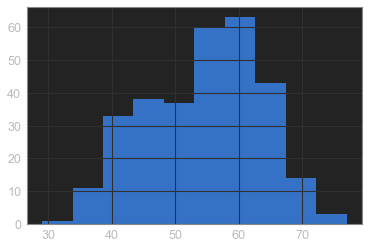

In [23]:
csv_file_from_url.age.hist()

[.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

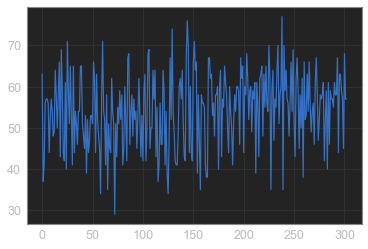

In [24]:
csv_file_from_url.age.plot()

[.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=crosstab)

In [25]:
some_date = csv_file_from_url.tail(5)
pd.crosstab(some_date.age, some_date.sex)

sex,0,1
age,,
45,0,1
57,2,1
68,0,1


[.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)

In [26]:
csv_file_from_url.groupby(['sex']).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275
